In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

#Ler os dados
dados = pd.read_csv("/content/drive/MyDrive/Trabalho Avaliativo 1 BIM - sistemas inteligentes/Wholesale_customers_data.csv", sep=',')
dados.shape

(440, 8)

In [ ]:
dados_categoricos1 = dados['Channel']
dados_categoricos2 = dados['Region']

dados_categoricos_normalizados1 = pd.get_dummies(data = dados_categoricos1, prefix='channel', prefix_sep='_', dtype='int')
dados_categoricos_normalizados2 = pd.get_dummies(data = dados_categoricos2, prefix='region', prefix_sep='_', dtype='int')


dados_categoricos_normalizados_final = pd.concat([dados_categoricos_normalizados1,
                                                  dados_categoricos_normalizados2],
                                                 axis=1)

print(dados_categoricos_normalizados_final.head(5))

   channel_1  channel_2  region_1  region_2  region_3
0          0          1         0         0         1
1          0          1         0         0         1
2          0          1         0         0         1
3          1          0         0         0         1
4          0          1         0         0         1


In [ ]:
dados_numericos = dados.drop(columns=['Channel', 'Region'])

from sklearn import preprocessing
normalizador = preprocessing.MinMaxScaler()
modelo_normalizador = normalizador.fit(dados_numericos)
from pickle import dump
dump(modelo_normalizador, open('/content/drive/MyDrive/Trabalho Avaliativo 1 BIM - sistemas inteligentes/normalizador1.pkl','wb'))

In [ ]:
#Normalizar os dados
dados_numericos_normalizados = modelo_normalizador.fit_transform(dados_numericos)
#Converter para dataframe
dados_numericos_normalizados = pd.DataFrame(data = dados_numericos_normalizados, columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

print(dados_numericos.head(5))
print(dados_numericos_normalizados.head(5))

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.112940  0.130727  0.081464  0.003106          0.065427    0.027847
1  0.062899  0.132824  0.103097  0.028548          0.080590    0.036984
2  0.056622  0.119181  0.082790  0.039116          0.086052    0.163559
3  0.118254  0.015536  0.045464  0.104842          0.012346    0.037234
4  0.201626  0.072914  0.077552  0.063934          0.043455    0.108093


In [ ]:
dados_normalizados_final = pd.concat([dados_numericos_normalizados, dados_categoricos_normalizados_final], axis=1)
dados_normalizados_final.head(100)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,channel_1,channel_2,region_1,region_2,region_3
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0,1,0,0,1
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0,1,0,0,1
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0,1,0,0,1
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,1,0,0,0,1
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.039010,0.067355,0.006821,0.005389,0.014727,1,0,0,0,1
96,0.000178,0.034871,0.087468,0.001972,0.094822,0.004464,0,1,0,0,1
97,0.003567,0.002710,0.006543,0.012310,0.001249,0.001252,1,0,0,0,1
98,0.004458,0.000776,0.008353,0.014299,0.001298,0.002691,1,0,0,0,1


In [ ]:
dados_normalizados_final.columns.values.tolist()

['Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen',
 'channel_1',
 'channel_2',
 'region_1',
 'region_2',
 'region_3']

In [ ]:
from sklearn.cluster import KMeans # clusterizador
import matplotlib.pyplot as plt # graficos
import math # matematica
from scipy.spatial.distance import cdist # calculo de distancia de distorções
import numpy as np # para procedimentos numericos
distortions = []
K = range(1, 101)
# Treinar iterativamente conforme n_clusters = K[i]
for i in K:
  WholeSale_Customers_model = KMeans(n_clusters= i).fit(dados_normalizados_final)
  distortions.append(
      sum(np.min(
          cdist(dados_normalizados_final, WholeSale_Customers_model.cluster_centers_, 'euclidean'), axis = 1) / dados_normalizados_final.shape[0]
      )
  )
print(distortions)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.9114173026051932, 0.6046454509497103, 0.38413635793510187, 0.28093226465368126, 0.19901628828454512, 0.15264561124199594, 0.14381149325900566, 0.13060932219399332, 0.12708419357123937, 0.12124965114746213, 0.11843534184342587, 0.11406333248843065, 0.11348492685533687, 0.10756389996203078, 0.10375473365151891, 0.10408009652845816, 0.09980395775491402, 0.09756319847747966, 0.09463485617776815, 0.09272764602676989, 0.09302384210042985, 0.0892711891706478, 0.08812167128617177, 0.08525213133472652, 0.08498396758168111, 0.08231504972874891, 0.08179179541844776, 0.08088397290019406, 0.07926864002221673, 0.07737534824740022, 0.07701384500873887, 0.07622144787429713, 0.07519302538346266, 0.07408498676656859, 0.07275096186322468, 0.0727400199245697, 0.07167498580705613, 0.06927384562660226, 0.06839520059188538, 0.06780137795507009, 0.06761839337433277, 0.06705066991967913, 0.06603293352228982, 0.06480003392276718, 0.06481551505025177, 0.06357299881663896, 0.0628811727727377, 0.062249059928241

<function matplotlib.pyplot.show(close=None, block=None)>

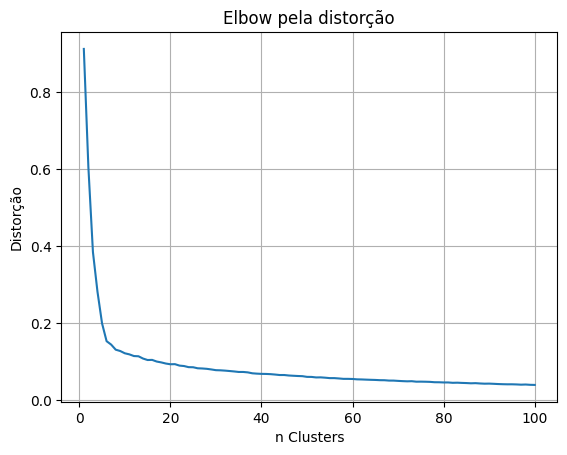

In [ ]:
fig, ax = plt.subplots()
ax.plot(K, distortions)
ax.set(xlabel = 'n Clusters', ylabel = 'Distorção', title='Elbow pela distorção')
ax.grid()
fig.savefig('elbow_distorcao.png')
plt.show

In [ ]:
x0 = K[0]
y0 = distortions[0]
xn = K[len(K)-1]
yn = distortions[len(distortions)-1]

#Iterar nos pontos gerados durante os treinamentos preliminares
distancias = []
for i in range(len(distortions)):
  x = K[i]
  y = distortions[i]
  numerador = abs((yn - y0) * x - (xn-x0) * y + xn * y0 - yn * x0)
  denominador = math.sqrt((yn - y0)**2 + (xn - x0)**2)
  distancias.append(numerador/denominador)

#Maior distancia
n_clusters_otimo = K[distancias.index(np.max(distancias))]
print(n_clusters_otimo)

8


In [ ]:
WholeSale_Customers_model = KMeans(n_clusters = n_clusters_otimo, random_state=42).fit(dados_normalizados_final)
print(WholeSale_Customers_model.cluster_centers_)
#Salvar o modelo definitivo
from pickle import dump
dump(WholeSale_Customers_model, open('/content/drive/MyDrive/Trabalho Avaliativo 1 BIM - sistemas inteligentes/Wholesale_Customer_cluster_2024.pkl', 'wb'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 8.18145373e-02  1.19066376e-01  1.46287246e-01  2.30604799e-02
   1.37844085e-01  3.64477706e-02 -3.33066907e-16  1.00000000e+00
  -1.38777878e-16  8.32667268e-17  1.00000000e+00]
 [ 7.76383240e-02  3.95643443e-02  3.69990506e-02  4.36733058e-02
   1.89728095e-02  2.08984890e-02  1.00000000e+00 -3.88578059e-16
  -2.77555756e-16  4.16333634e-17  1.00000000e+00]
 [ 1.15019922e-01  5.19478152e-02  4.33635017e-02  5.09881341e-02
   2.32100094e-02  2.49093146e-02  1.00000000e+00  2.77555756e-16
   1.00000000e+00 -1.38777878e-17 -2.22044605e-16]
 [ 1.03858613e-01  3.06257914e-02  4.73447083e-02  9.40115001e-02
   1.17507909e-02  2.30056916e-02  1.00000000e+00  2.77555756e-16
   8.32667268e-17  1.00000000e+00 -1.11022302e-16]
 [ 6.49747608e-02  1.24392923e-01  1.75941406e-01  2.49092589e-02
   2.05939231e-01  2.57822278e-02 -2.22044605e-16  1.00000000e+00
   5.55111512e-17  1.00000000e+00  0.00000000e+00]
 [ 4.63405500e-02  1.46086080e-01  1.99068136e-01  4.20602050e-02
   2.01407941e-01  

In [ ]:
template_treinamento = ['Fresh',
  'Milk',
  'Grocery',
  'Frozen',
  'Detergents_Paper',
  'Delicassen',
  'channel_1',
  'channel_2',
  'region_1',
  'region_2',
  'region_3']

template_bruto = ['Channel',
  'Region',
  'Fresh',
  'Milk',
  'Grocery',
  'Frozen',
  'Detergents_Paper',
  'Delicassen']

from pickle import load
import pandas as pd
import numpy as np
template_df = pd.DataFrame(columns = template_treinamento)
Wholesale_customer_2024 = load(open('/content/drive/MyDrive/Trabalho Avaliativo 1 BIM - sistemas inteligentes/Wholesale_Customer_cluster_2024.pkl', 'rb'))
#print(obesity_cluster_2024.cluster_centers_)

from pickle import load
modelo_normalizador = load(open('/content/drive/MyDrive/Trabalho Avaliativo 1 BIM - sistemas inteligentes/normalizador1.pkl', 'rb'))

nova_instancia = [["1",	"1",	11686,	2154,	6824,	3527,	592,	697]]
#Criar um database novo com apenas uma nova_instancia e inserindo as colunas originais do dataset bruto que nós importamos
dados = pd.DataFrame(nova_instancia, columns=['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])


In [ ]:
Wholesale_customer_2024.cluster_centers_.shape

(8, 11)

In [ ]:
#Obter nova instancia de dados
#Dados Categoricos
dados_categoricos1 = dados['Channel']
dados_categoricos2 = dados['Region']

dados_categoricos_normalizados1 = pd.get_dummies(data = dados_categoricos1, prefix='channel', prefix_sep='_', dtype='int')
dados_categoricos_normalizados2 = pd.get_dummies(data = dados_categoricos2, prefix='region', prefix_sep='_', dtype='int')


dados_categoricos_normalizados_final = pd.concat([dados_categoricos_normalizados1,
                                                  dados_categoricos_normalizados2],
                                                 axis=1)

dados_numericos = dados.drop(columns=['Channel', 'Region'])
print(dados_numericos)

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  11686  2154     6824    3527               592         697


In [ ]:
dados_numericos_normalizados = modelo_normalizador.transform(dados_numericos)
#Converter para dataframe
dados_numericos_normalizados = pd.DataFrame(data = dados_numericos_normalizados, columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

dados_normalizados_nova_instancia = pd.concat([dados_numericos_normalizados, dados_categoricos_normalizados_final], axis=1)
dados_normalizados_final = pd.merge(right=template_df, how='outer', left=dados_normalizados_nova_instancia)
print(dados_normalizados_final.head(1))

#Preencher os NaN com 0's
dados_normalizados_final = dados_normalizados_final.fillna(0)
print(dados_normalizados_final.head(5))

#Normalizar a nova instancia com o modelo salvo inicialmente
dados_normalizados_final = dados_normalizados_final[template_treinamento]

      Fresh     Milk  Grocery    Frozen  Detergents_Paper  Delicassen  \
0  0.104175  0.02858  0.07352  0.057557          0.014428    0.014476   

   channel_1  region_1 channel_2 region_2 region_3  
0          1         1       NaN      NaN      NaN  
      Fresh     Milk  Grocery    Frozen  Detergents_Paper  Delicassen  \
0  0.104175  0.02858  0.07352  0.057557          0.014428    0.014476   

   channel_1  region_1  channel_2  region_2  region_3  
0          1         1          0         0         0  


In [ ]:
cluster = Wholesale_customer_2024.predict(dados_normalizados_final)
print("Cluster que a nova instância pertence: ", cluster)

Cluster que a nova instância pertence:  [2]


In [ ]:
print("Centroide do cluster da nova instancia: ", Wholesale_customer_2024.cluster_centers_[Wholesale_customer_2024.predict(dados_normalizados_final)])

Centroide do cluster da nova instancia:  [[ 1.15019922e-01  5.19478152e-02  4.33635017e-02  5.09881341e-02
   2.32100094e-02  2.49093146e-02  1.00000000e+00  2.77555756e-16
   1.00000000e+00 -1.38777878e-17 -2.22044605e-16]]


In [ ]:
dados_legiveis_numericos = modelo_normalizador.inverse_transform(dados_numericos_normalizados) # inverse_transform serve para demosnormalizar (deixar legíveis)
dados_legiveis_numericos = pd.DataFrame(data = dados_legiveis_numericos, columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
dados_legiveis_numericos = dados_legiveis_numericos.astype(int)
display(dados_legiveis_numericos)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,11686,2154,6824,3527,592,697


In [ ]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

#Dados categoricos convertidos
dados_legiveis_categoricos = undummify(dados_categoricos_normalizados_final)
display(dados_legiveis_categoricos)

,channel,region
0,1,1


In [ ]:
dados_legiveis_centroide = pd.concat([dados_legiveis_categoricos, dados_legiveis_numericos], axis=1)
display(dados_legiveis_centroide)

,channel,region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,1,11686,2154,6824,3527,592,697
